<a href="https://colab.research.google.com/github/juniomuniz/Machine_Learning/blob/main/regressao%20Linear%20Multipla_MPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets

# metadata
print(auto_mpg.metadata)

# variable information
print(auto_mpg.variables)

{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

In [ ]:
X

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82,1
394,97.0,4,52.0,2130,24.6,82,2
395,135.0,4,84.0,2295,11.6,82,1
396,120.0,4,79.0,2625,18.6,82,1


In [ ]:
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [ ]:
X[X['horsepower'].isna()]

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
32,98.0,4,NaN,2046,19.0,71,1
126,200.0,6,NaN,2875,17.0,74,1
330,85.0,4,NaN,1835,17.3,80,2
336,140.0,4,NaN,2905,14.3,80,1
354,100.0,4,NaN,2320,15.8,81,2
374,151.0,4,NaN,3035,20.5,82,1


In [ ]:
X_semna = X.dropna()

In [ ]:
X_semna[X_semna["horsepower"].isna()]

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin


In [ ]:
import numpy as np
idx_apagar = X[X["horsepower"].isna()].index

In [ ]:
y_semna = y[~y.index.isin(idx_apagar)]

In [ ]:
y_semna

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az

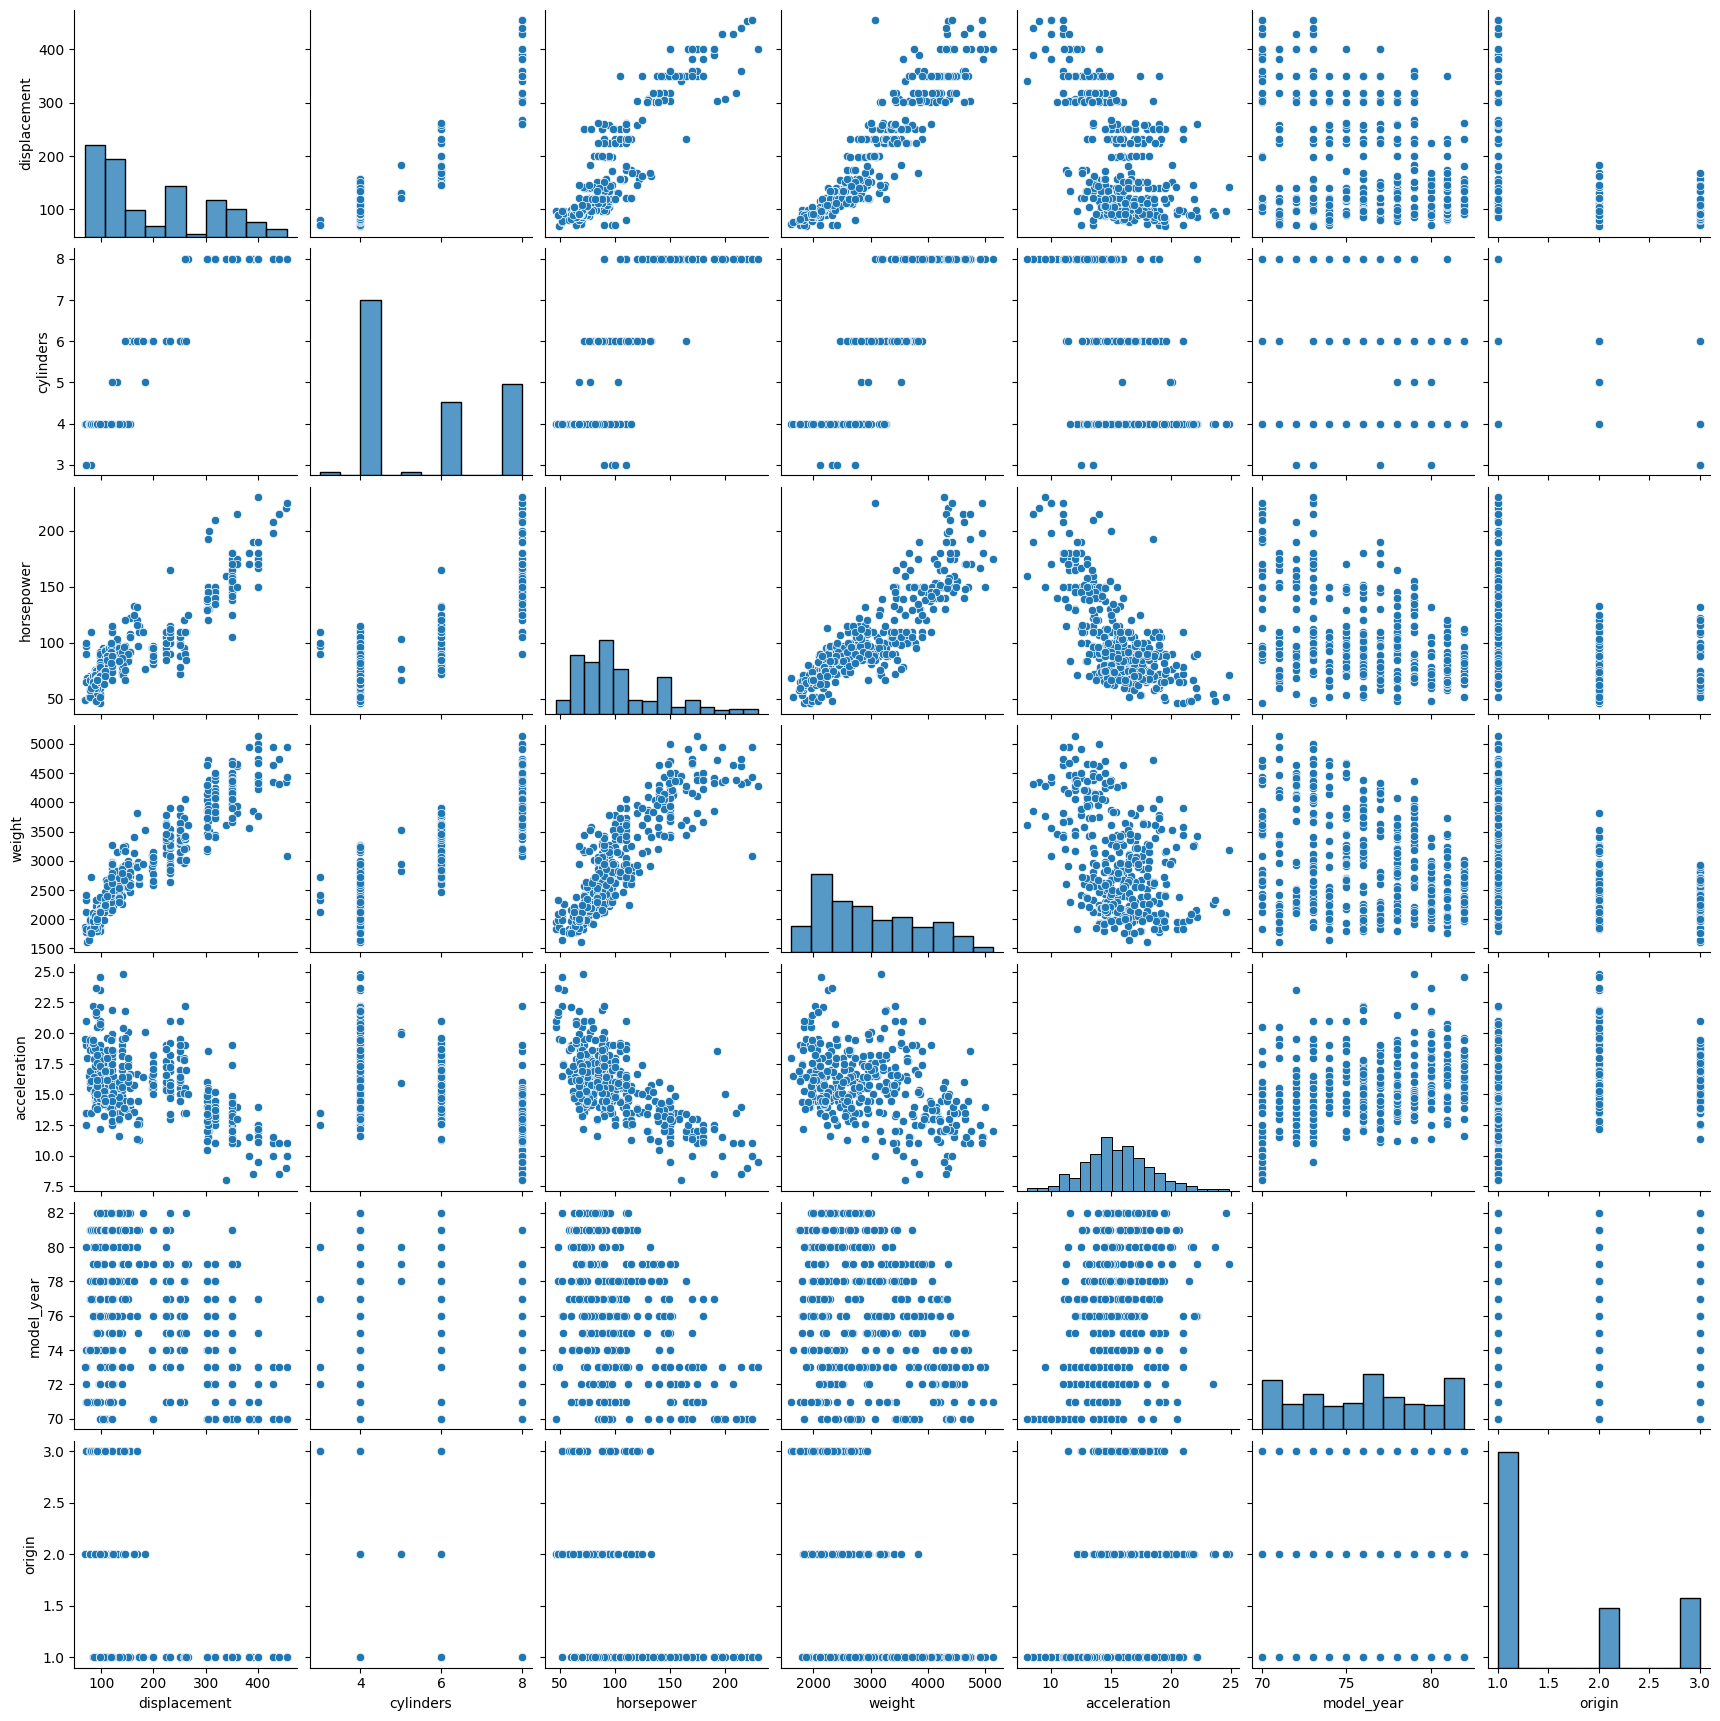

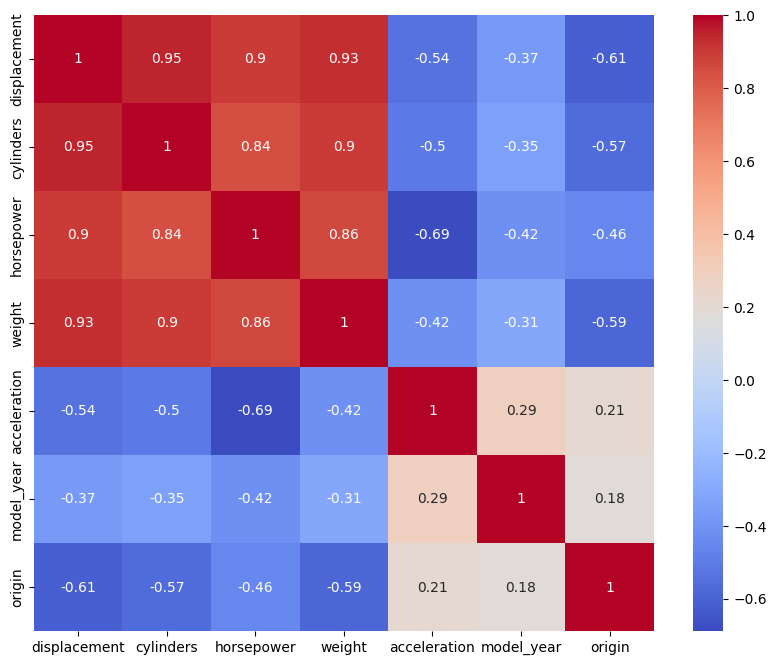

In [ ]:
sns.pairplot(X_semna)
plt.show()

corr_matrix = X_semna.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
X_semints = X_semna[["displacement", "cylinders", "horsepower", "weight", "acceleration"]]

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_semints)

X_scaled_df = pd.DataFrame(X_scaled, columns=X_semints.columns)
X_scaled_df["model_year"] = X_semna["model_year"]
X_scaled_df["origin"] = X_semna["origin"]
print(X_scaled_df.head())

   displacement  cylinders  horsepower    weight  acceleration  model_year  \
0      1.077290   1.483947    0.664133  0.620540     -1.285258        70.0   
1      1.488732   1.483947    1.574594  0.843334     -1.466724        70.0   
2      1.182542   1.483947    1.184397  0.540382     -1.648189        70.0   
3      1.048584   1.483947    1.184397  0.536845     -1.285258        70.0   
4      1.029447   1.483947    0.924265  0.555706     -1.829655        70.0   

   origin  
0     1.0  
1     1.0  
2     1.0  
3     1.0  
4     1.0  


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_semna, test_size=0.3, random_state=42)

X_train




,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
109,-0.826826,-0.864014,-0.272342,-0.705613,0.347933,73.0,1.0
17,0.053468,0.309967,-0.506461,-0.460422,0.166467,70.0,1.0
318,-0.721574,-0.864014,-0.324369,-0.640778,-0.196464,80.0,3.0
24,0.043900,0.309967,-0.376395,-0.388515,-0.196464,70.0,1.0
126,0.531890,0.309967,-0.116263,0.422502,0.529398,NaN,NaN
...,...,...,...,...,...,...,...
71,1.048584,1.483947,1.184397,1.077916,-1.103792,72.0,3.0
106,0.359658,0.309967,-0.116263,-0.222304,-0.196464,73.0,1.0
270,-0.415384,-0.864014,-0.506461,-0.144503,0.747157,78.0,3.0
348,-0.922511,-0.864014,-1.026725,-0.704434,1.872244,81.0,3.0


In [ ]:
X_d = X_train["displacement"].values
X_a = X_train["acceleration"].values
X_w = X_train["weight"].values
X_c = X_train["cylinders"].values
X_h = X_train["horsepower"].values

In [ ]:
with pm.Model() as model_all:
  alpha = pm.Normal("alpha",0,1)
  beta_displacement = pm.Normal("b_d",0,1)
  beta_weight = pm.Normal("b_w",0,1)
  beta_cylinders = pm.Normal("b_c",0,1)
  beta_horsepower = pm.Normal("b_h",0,1)
  beta_acc = pm.Normal("b_a",0,1)

  eps = pm.HalfNormal("eps",1)

  mu = alpha + beta_displacement * X_d + beta_weight * X_w + beta_cylinders * X_c + beta_horsepower * X_h + beta_acc * X_a

  likelihood = pm.Normal("y_obs",mu,eps,observed=y_train.mpg.values)

In [ ]:
with model_all:
  trace_model_all_priori = pm.sample_prior_predictive()

array([<Axes: xlabel='y_obs / y_obs'>], dtype=object)

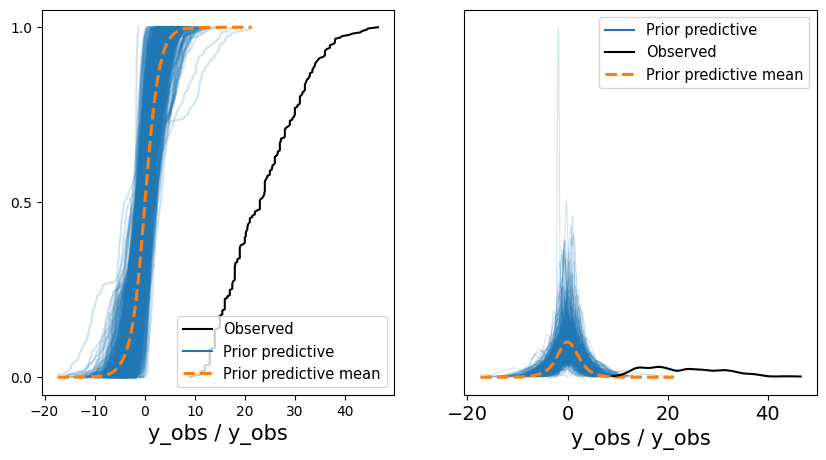

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_model_all_priori, group='prior', kind='cumulative',ax=axes[0])
az.plot_ppc(trace_model_all_priori, group='prior',ax=axes[1])

In [ ]:
with model_all:
  trace_model_all = pm.sample()

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'b_d'}>, <Axes: title={'center': 'b_d'}>],
       [<Axes: title={'center': 'b_w'}>, <Axes: title={'center': 'b_w'}>],
       [<Axes: title={'center': 'b_c'}>, <Axes: title={'center': 'b_c'}>],
       [<Axes: title={'center': 'b_h'}>, <Axes: title={'center': 'b_h'}>],
       [<Axes: title={'center': 'b_a'}>, <Axes: title={'center': 'b_a'}>],
       [<Axes: title={'center': 'eps'}>, <Axes: title={'center': 'eps'}>]],
      dtype=object)

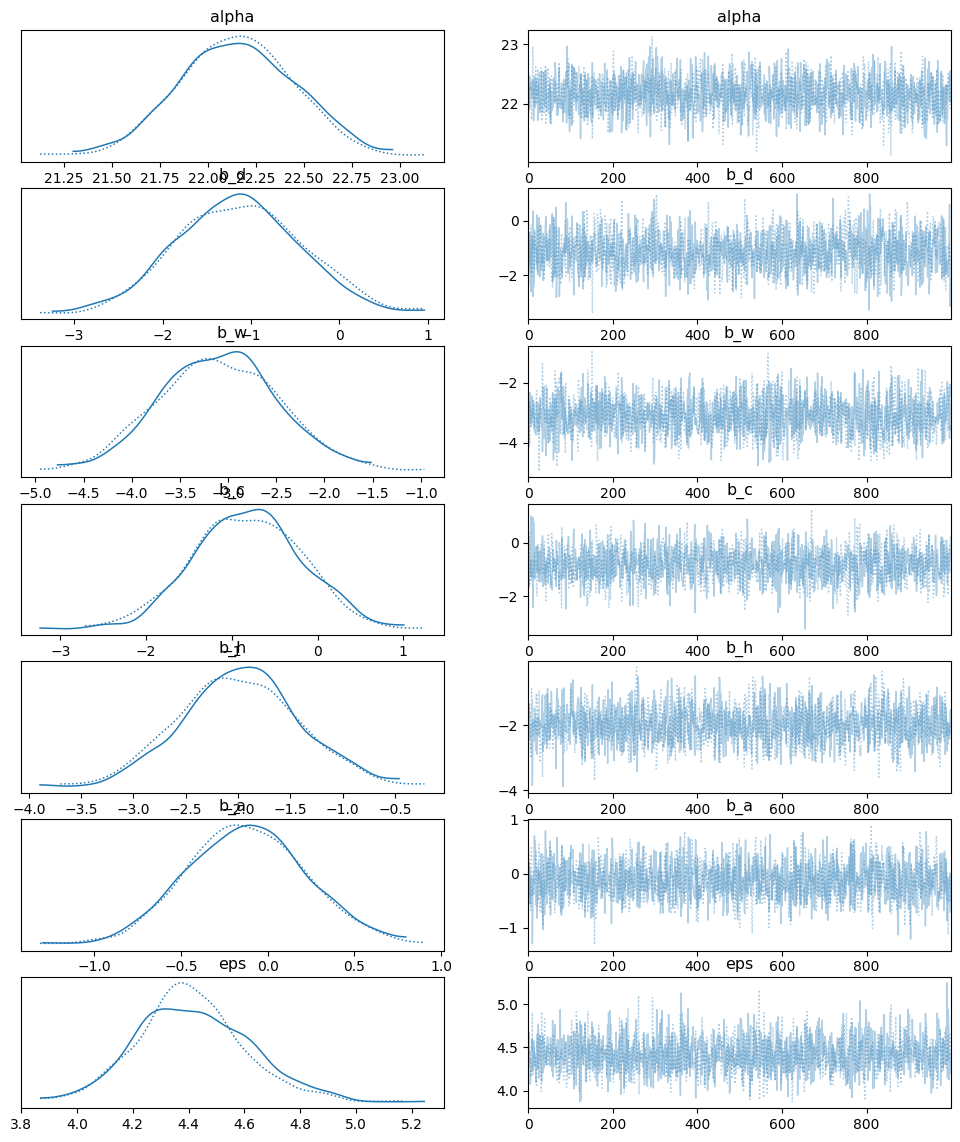

In [ ]:
az.plot_trace(trace_model_all)

In [ ]:
pm.summary(trace_model_all)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,22.152,0.295,21.634,22.709,0.007,0.005,1809.0,1506.0,1.00
b_d,-1.135,0.691,-2.373,0.171,0.017,0.012,1728.0,1530.0,1.00
b_w,-3.094,0.612,-4.228,-1.953,0.015,0.011,1614.0,1478.0,1.01
b_c,-0.820,0.625,-1.923,0.356,0.015,0.012,1725.0,1280.0,1.00
b_h,-1.979,0.561,-2.937,-0.844,0.014,0.010,1529.0,1218.0,1.00
b_a,-0.124,0.339,-0.751,0.507,0.008,0.007,1845.0,1555.0,1.00
eps,4.414,0.198,4.039,4.791,0.005,0.003,1790.0,1392.0,1.00


In [ ]:
with model_all:
  trace_model_all_post = pm.sample_posterior_predictive(trace_model_all)

array([<Axes: xlabel='y_obs / y_obs'>], dtype=object)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


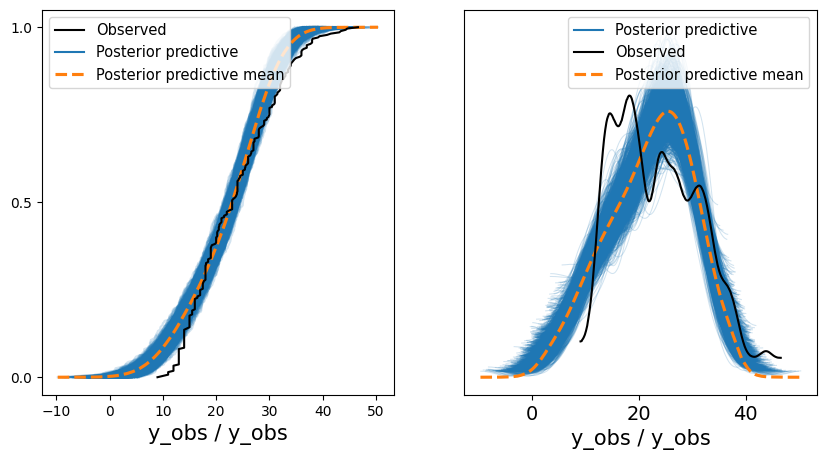

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_model_all_post, group='posterior', kind='cumulative', ax=axes[0])
az.plot_ppc(trace_model_all_post, group='posterior', ax=axes[1])

In [ ]:
#Ganhou? Faça isso para gerar as predições
with pm.Model() as model_all:
  X_d_c = pm.MutableData("X_d_c",X_d)
  X_w_c = pm.MutableData("X_w_c",X_w)
  X_c_c = pm.MutableData("X_c_c",X_c)
  X_h_c = pm.MutableData("X_h_c",X_h)
  X_a_c = pm.MutableData("X_a_c",X_a)
  y_obs_c = pm.MutableData("y_obs_c",y_train.mpg.values)

  alpha = pm.Normal("alpha",0,1)
  beta_displacement = pm.Normal("b_d",0,1)
  beta_weight = pm.Normal("b_w",0,1)
  beta_cylinders = pm.Normal("b_c",0,1)
  beta_horsepower = pm.Normal("b_h",0,1)
  beta_acc = pm.Normal("b_a",0,1)

  eps = pm.HalfNormal("eps",1)

  mu = alpha + beta_displacement * X_d_c + beta_weight * X_w_c + beta_cylinders * X_c_c + beta_horsepower * X_h_c + beta_acc * X_a_c

  likelihood = pm.Normal("y_obs",mu,eps,observed=y_obs_c)

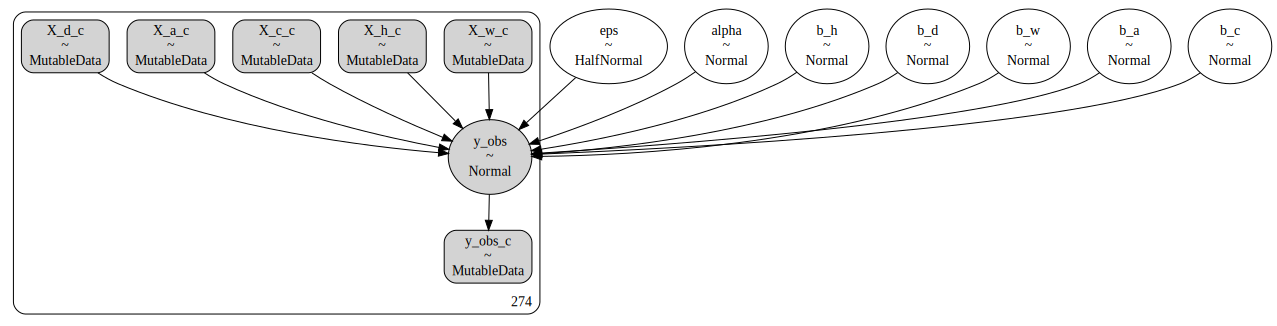

In [ ]:
pm.model_to_graphviz(model_all)

In [ ]:
with model_all:
  trace_m = pm.sample()

In [ ]:
with model_all:
    pm.set_data({
        "X_a_c": X_test.acceleration.values,
        "X_w_c": X_test.weight.values,
        "X_h_c": X_test.horsepower.values,
        "X_c_c": X_test.cylinders.values,
        "X_d_c": X_test.displacement.values,
        "y_obs_c": y_test.mpg.values
    })
    trace_post_m = pm.sample_posterior_predictive(trace_m)

In [ ]:
preds = trace_post_m.posterior_predictive["y_obs"].mean(["chain","draw"]).to_numpy()

In [ ]:
preds

array([28.61936243, 23.68644923, 30.44044517, 29.23279802, 25.13297818,
       28.41403395,  8.87875791, 27.7984524 , 21.01073051, 31.0017882 ,
       11.59696969, 22.47151731, 11.68993667, 28.41503026, 19.11262768,
       25.64577605, 21.90568143, 27.5068707 , 25.93071356, 26.23832249,
       22.99863618, 29.17625069, 29.49745107, 16.77497808, 29.77617287,
       27.04807643, 24.54128214, 19.95784431, 30.36093316, 26.65820517,
       11.895651  , 21.37143636, 16.75824837, 26.42364364, 11.05136741,
       29.57464692, 12.11326331, 28.09220471, 12.93613655,  7.35835996,
       14.22736327, 28.70874613, 28.93503377, 27.8300459 , 10.81601465,
        6.23310989, 20.27812932, 28.97786165, 26.90931343, 29.81508219,
       12.49381455, 26.80263454, 26.61021989, 27.50365198, 21.59992928,
       18.40166999, 18.94799127, 21.91827649, 26.49491592, 27.14325452,
        4.79004809, 21.64952541, 22.64640869, 24.59678839, 25.63033457,
       27.57006153, 25.19933463, 29.55980292, 18.4283817 ,  8.95

In [ ]:
rounded_preds = np.round(preds)

df_predictions = pd.DataFrame({
    'Predicted': preds,
    'Actual': y_test.mpg.values
})

df_predictions['Abs_Difference'] = np.abs(df_predictions['Predicted'] - df_predictions['Actual'])

print(df_predictions.head())
print(df_predictions['Abs_Difference'].sum())



   Predicted  Actual  Abs_Difference
0  28.619362    26.0        2.619362
1  23.686449    21.6        2.086449
2  30.440445    36.1        5.659555
3  29.232798    26.0        3.232798
4  25.132978    27.0        1.867022
400.13619704558937
